# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### - Import Libraries

In [2]:
import os
import glob
import pandas as pd
#os.chdir() #Current working directory that contains your dataset and code file

#### - Use glob to match the pattern "csv"

In [3]:
# Using glob to match the files with csv pattern and append to a list
extension = '*.csv'
lst = []
for file in glob.glob(extension):
    lst.append(file)
print(lst)

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'merged.csv', 'Port_Harcourt_Branch.csv']


#### - Combine all the files in the generated list above and export to a CSV and read new csv file

In [4]:
# pd.concat to merge all 3 csv files 
combined_csv = pd.concat([pd.read_csv(csv_file) for csv_file in lst ])

# export combined csv to a csv file
#combined_csv.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [5]:
merged = pd.read_csv('merged.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')

#### - Use the head() method to view first few rows of the dataset

In [7]:
merged.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### - Check the number of rows and columns present in the data using the shape attribute.

In [8]:
merged.shape

(1000, 17)

#### - Generate the names of the columns using the columns attribute.

In [9]:
merged.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

####  - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [10]:
merged.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


#### -   Data statistical summary

1. The highest price of a product is 35,985.6 Naira with the minimum being 3,682.8 Naira.

2. The average price of a product sold at the store is 2,001.9668 Naira

3. The maximum number of products purchased by a customer is 10 items with the minimum being 1 item

4. The average number of products observed to have been bought by the customers is approx. 3 items

5. The highest tax fee a customer has paid is 1,7874.0 Naira and the minimum is 5,536.57 Naira

6. The gross margin percentage is average

7. The average rating of the store is a 6.9 from 10

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [11]:
merged.isnull().sum().any()

False

####  - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.


In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

####  - Use `to_datetime()` to convert the `date` column to `datetime`

In [13]:
merged['Date'] = pd.to_datetime(merged['Date'])

#### - Check the datatype to confirm if it's in `datetime`

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### - Repeat the two steps above to the `time` column

In [15]:
merged['Time'] = pd.to_datetime(merged['Time'])
merged['Time']

0     2021-05-05 13:27:00
1     2021-05-05 18:07:00
2     2021-05-05 17:03:00
3     2021-05-05 16:19:00
4     2021-05-05 15:30:00
              ...        
995   2021-05-05 10:33:00
996   2021-05-05 11:40:00
997   2021-05-05 19:12:00
998   2021-05-05 11:40:00
999   2021-05-05 13:46:00
Name: Time, Length: 1000, dtype: datetime64[ns]

## Extract Features from date & time

#### - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [16]:
merged['Day'] = merged['Date'].dt.day
merged['Day']

0      20
1       6
2       9
3      15
4      11
       ..
995    23
996     9
997    29
998    18
999    29
Name: Day, Length: 1000, dtype: int64

#### - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [17]:
merged['Month'] = merged['Date'].dt.month
merged['Month']

0      2
1      2
2      3
3      1
4      3
      ..
995    1
996    1
997    3
998    2
999    1
Name: Month, Length: 1000, dtype: int64

#### -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [18]:
merged['Year'] = merged['Date'].dt.year
merged['Year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Year, Length: 1000, dtype: int64

#### - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [19]:
merged['Hour'] = merged['Time'].dt.hour
merged['Hour']

0      13
1      18
2      17
3      16
4      15
       ..
995    10
996    11
997    19
998    11
999    13
Name: Hour, Length: 1000, dtype: int64

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [20]:
merged['Hour'].nunique()

11

In [21]:
merged['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [22]:
cat_cols = [col for col in merged.columns if merged[col].dtype == "object" ]
cat_cols

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### - From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [23]:
merged['Branch'].unique().tolist()

['B', 'A', 'C']

In [24]:
print("Total Number of unique values in the Branch Column : {}". format(len(merged['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [25]:
merged['City'].unique().tolist()
nos = merged['City'].unique().tolist()

In [26]:
print("Total Number of unique values in the City Column : {}". format(len(nos)))

Total Number of unique values in the City Column : 3


In [27]:
merged['Customer type'].unique().tolist()
nos = merged['Customer type'].unique().tolist()
print("Total Number of unique values in the Customer type Column : {}". format(len(nos)))

Total Number of unique values in the Customer type Column : 2


In [28]:
merged['Gender'].unique().tolist()
nos = merged['Gender'].unique().tolist()
print("Total Number of unique values in the Gender Column : {}". format(len(nos)))

Total Number of unique values in the Gender Column : 2


In [29]:
merged['Product line'].unique().tolist()
nos = merged['Product line'].unique().tolist()
print("Total Number of unique values in the Product line Column : {}". format(len(nos)))

Total Number of unique values in the Product line Column : 6


In [30]:
merged['Payment'].unique().tolist()
nos = merged['Payment'].unique().tolist()
print("Total Number of unique values in the Payment Column : {}". format(len(nos)))

Total Number of unique values in the Payment Column : 3


In [31]:
merged['Invoice ID'].unique().tolist()
nos = merged['Invoice ID'].unique().tolist()
print("Total Number of unique values in the Invoice ID Column : {}". format(len(nos)))

Total Number of unique values in the Invoice ID Column : 1000


#### - The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [32]:
merged['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [33]:
merged['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

In [34]:
merged['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [35]:
merged['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [36]:
merged['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

## Step 5 - Aggregration with GroupBy

#### - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [37]:
city = merged.groupby('City')
agg_func = {sum, np.mean}

####  - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [38]:
city['gross income'].agg(agg_func)

,mean,sum
City,,
Abuja,5483.528675,1820531.52
Lagos,5354.640529,1820577.78
Port Harcourt,5778.852256,1895463.54


Port Harcourt has the highest total gross income with a sum of 5,686,390.62	Naira

In [39]:
city['Unit price'].agg(agg_func)

,mean,sum
City,,
Abuja,20037.339759,6652396.8
Lagos,19721.107059,6705176.4
Port Harcourt,20379.248780,6684393.6


In [40]:
city['Tax 5%'].agg(agg_func)

,mean,sum
City,,
Abuja,5483.528675,1820531.52
Lagos,5354.640529,1820577.78
Port Harcourt,5778.852256,1895463.54


Port Harcourt branch has a higher tax compared to others

In [41]:
city['Rating'].agg({min, max, np.mean})

,min,max,mean
City,,,
Abuja,4.0,10.0,6.818072
Lagos,4.0,10.0,7.027059
Port Harcourt,4.0,10.0,7.072866


Port harcourt seems to be the customers favourite branch with an average of 7.07, next in line is the lagos branch

In [42]:
city['Product line'].agg('count')

City
Abuja            332
Lagos            340
Port Harcourt    328
Name: Product line, dtype: int64

Lagos branch sells more products compared to other branches

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### - Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

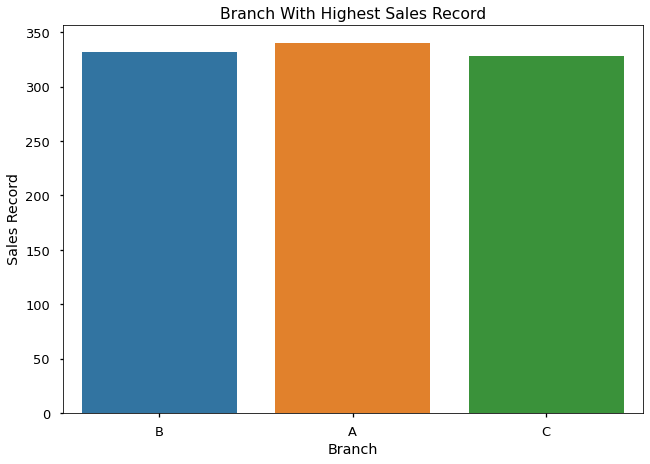

In [43]:
ax = sns.countplot(x= 'Branch', data= merged)
ax.set_title('Branch With Highest Sales Record')
plt.ylabel('Sales Record')
plt.show()

Branch A (Lagos) haas the highest sales as seen in the image above

#### Explore a countplot for the `Payment` and `City` Column

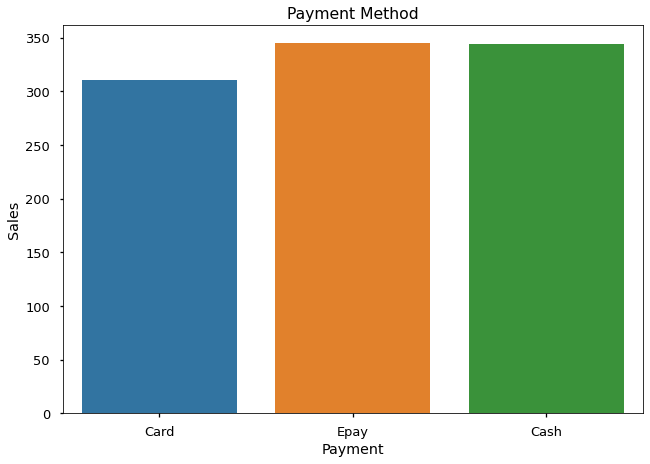

In [44]:
ax = sns.countplot(x= 'Payment', data= merged)
ax.set_title('Payment Method')
plt.ylabel('Sales')
plt.show()

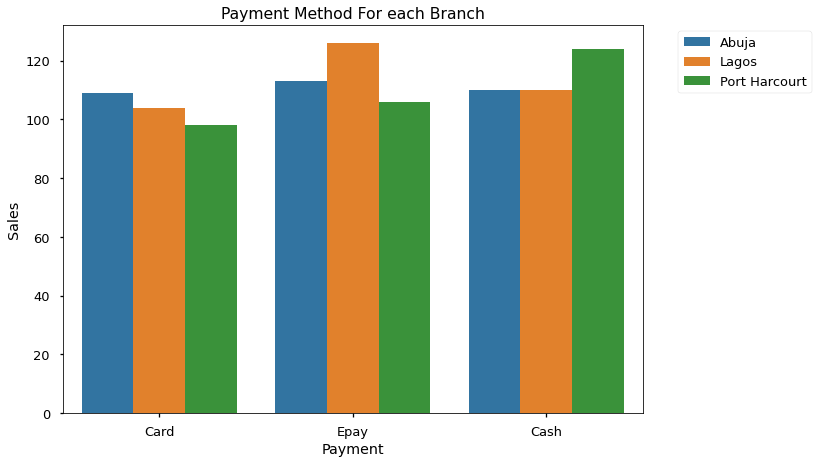

In [45]:
ax = sns.countplot(x= 'Payment', data= merged, hue='City')
ax.set_title('Payment Method For each Branch')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The Lagos branch favours Epay
Port Harcourt favours Cash payment
Abuja also favours Epay payment method 

#### - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

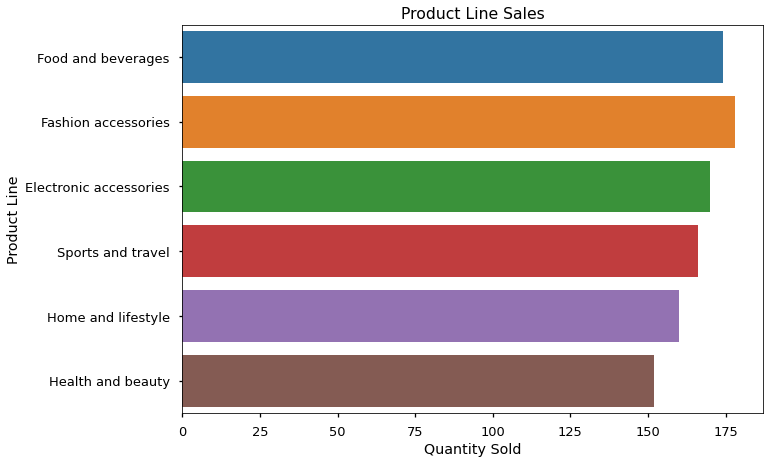

In [46]:
ax = sns.countplot(y= 'Product line', data= merged)
ax.set_title('Product Line Sales')
plt.ylabel('Product Line')
plt.xlabel('Quantity Sold')
plt.show()

Fashion Accessories has more quantity sold, followed closely by food and beverages

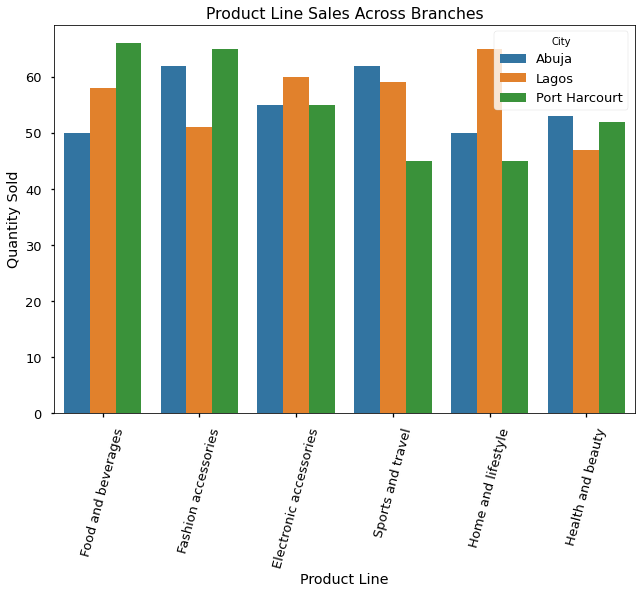

In [47]:
ax = sns.countplot(x= 'Product line', data= merged, hue = 'City', )
ax.set_title('Product Line Sales Across Branches')
plt.xticks(rotation = 75)
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')


plt.show()

####  -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

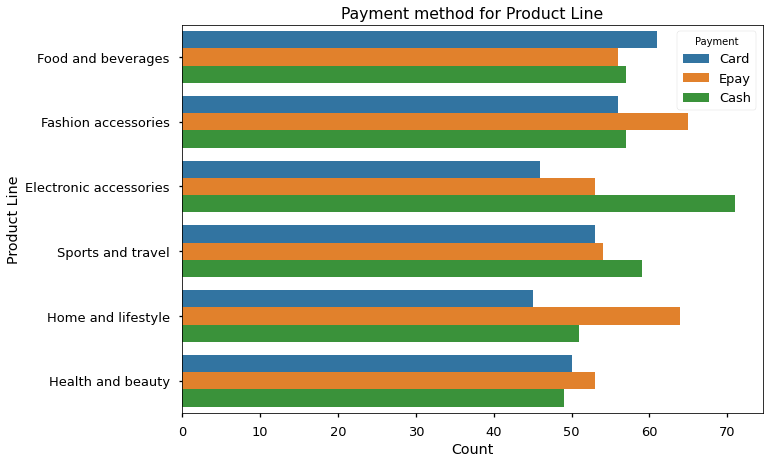

In [48]:
ax = sns.countplot(y= 'Product line', data= merged, hue = 'Payment')
ax.set_title('Payment method for Product Line')
plt.ylabel('Product Line')
plt.xlabel('Count')
plt.show()

#### - Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

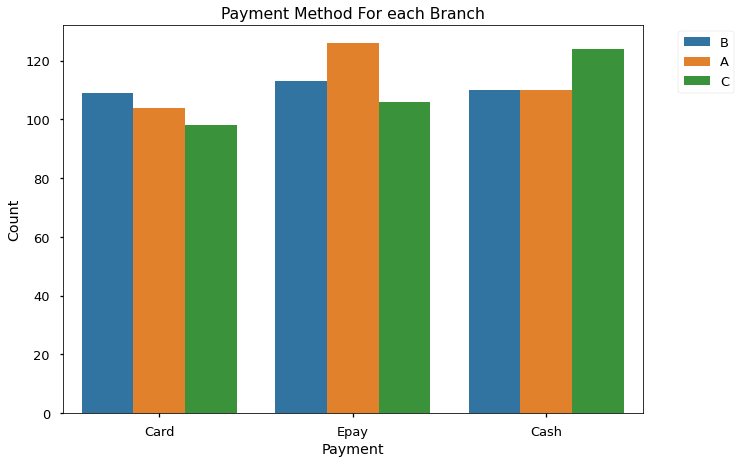

In [49]:
ax = sns.countplot(x= 'Payment', data= merged, hue='Branch')
ax.set_title('Payment Method For each Branch')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

####  Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

[]

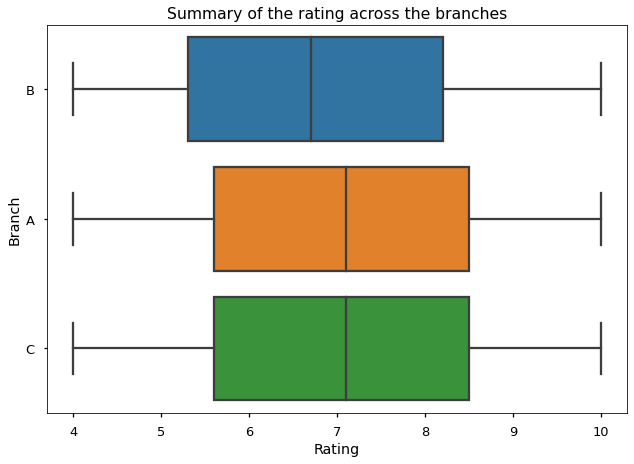

In [50]:
ax = sns.boxplot(x= 'Rating', y = 'Branch', data= merged)
ax.set_title('Summary of the rating across the branches')
plt.plot()

Branch B(Abuja) has the lowest average rating

####  - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

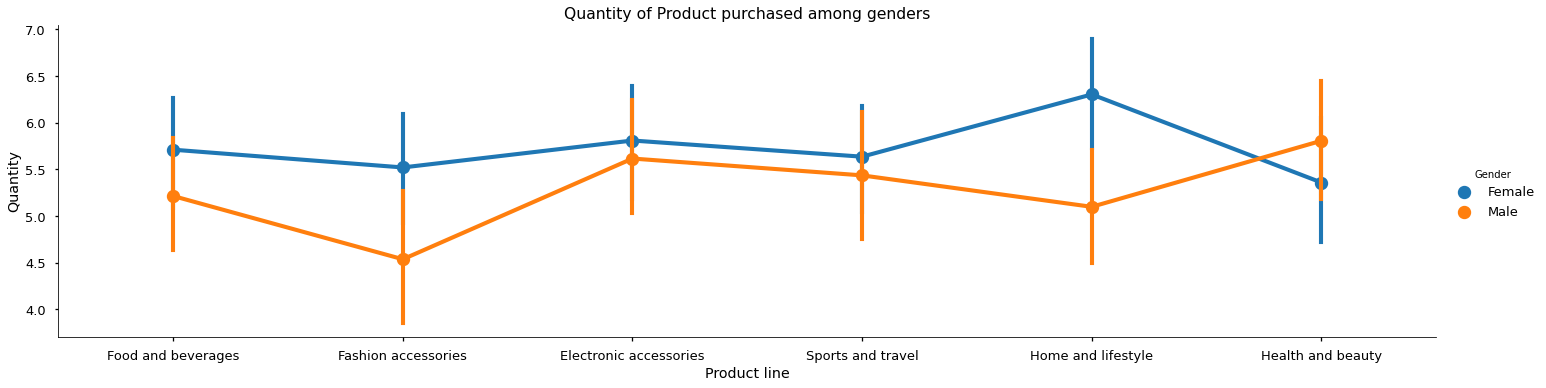

In [51]:
sns.catplot(x= 'Product line', y = 'Quantity',data=merged, hue = 'Gender', aspect= 4, kind = 'point')
plt.title('Quantity of Product purchased among genders')
plt.show()

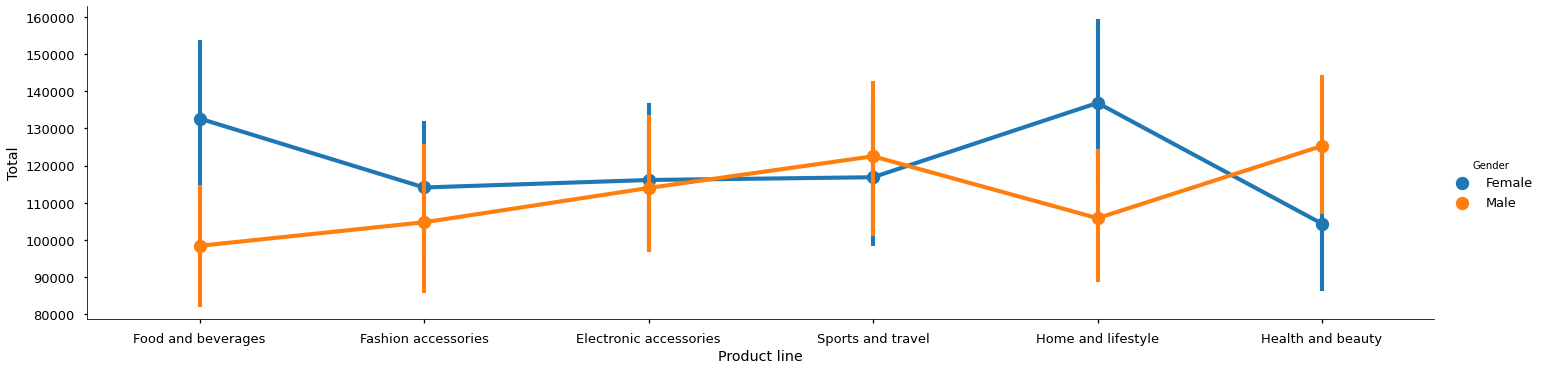

In [52]:
sns.catplot(x= 'Product line', y = 'Total',data=merged, hue = 'Gender', aspect= 4, kind= 'point')
plt.show()

- Products such as Health and Safety, Sports and Travel

## Data Visualization
#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

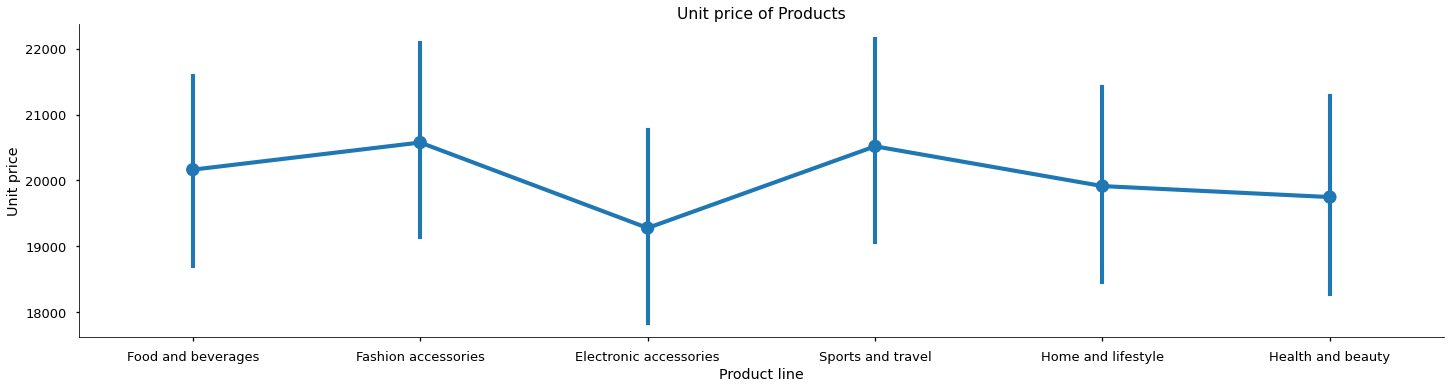

In [53]:
sns.catplot(x= 'Product line', y = 'Unit price',data=merged, aspect= 4, kind = 'point')
plt.title('Unit price of Products')
plt.show()

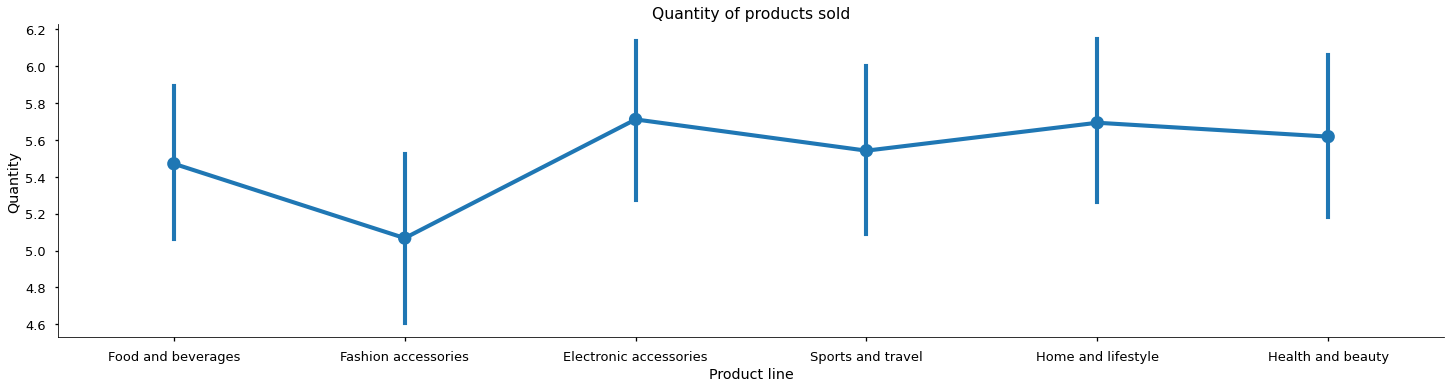

In [54]:
sns.catplot(x= 'Product line', y = 'Quantity',data=merged, aspect= 4, kind = 'point')
plt.title('Quantity of products sold')
plt.show()

#### Insight
- Essentials like food and beverages, health and beauty, home and life style sold high quantity despite their unit price being high
- Electronic has the lowest unit price, thereby recording the highest sales
- Fashion accessories has the lowest sales with a unit price on the high side


## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


- cogs and product line
- rating and quantity
- product line vs gross income
- payment method and tax
- time vs quantity

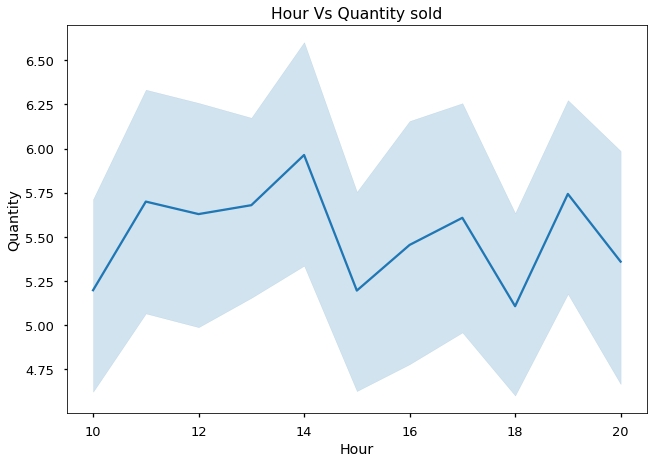

In [55]:
sns.lineplot(x = 'Hour', y ='Quantity', data = merged)
plt.title('Hour Vs Quantity sold')
plt.show()

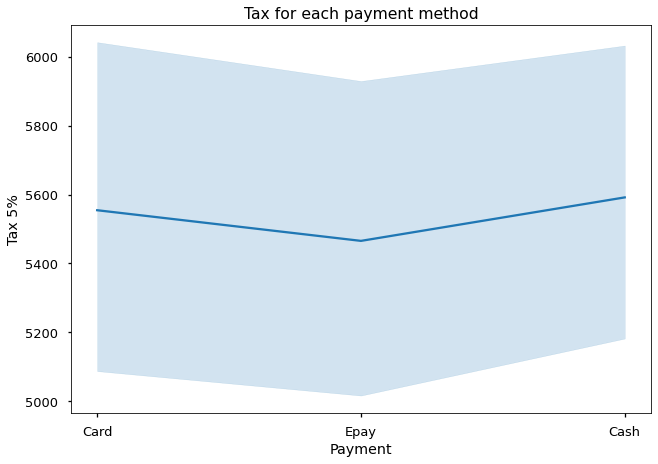

In [56]:
sns.lineplot(x = 'Payment', y = 'Tax 5%', data = merged)
plt.title('Tax for each payment method')
plt.show()

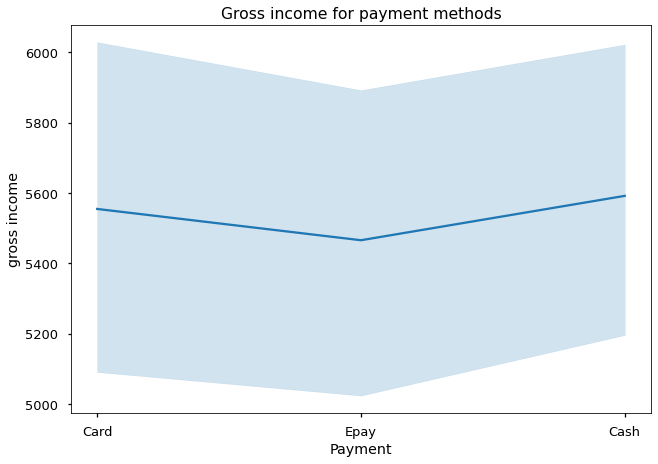

In [57]:
sns.lineplot(x = 'Payment', y = 'gross income', data = merged)
plt.title('Gross income for payment methods')
plt.show()

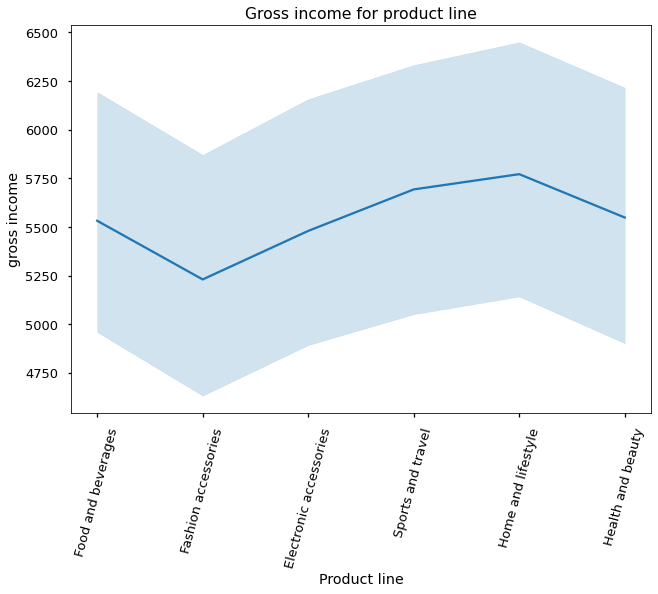

In [58]:
sns.lineplot(x = 'Product line', y = 'gross income', data = merged)
plt.title('Gross income for product line')
plt.xticks(rotation = 75)
plt.show()

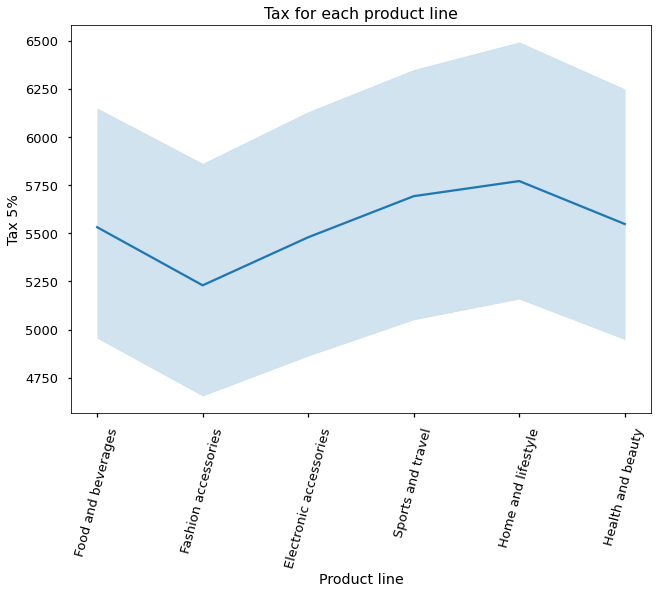

In [59]:
sns.lineplot(x = 'Product line', y = 'Tax 5%', data = merged)
plt.title('Tax for each product line')
plt.xticks(rotation = 75)
plt.show()

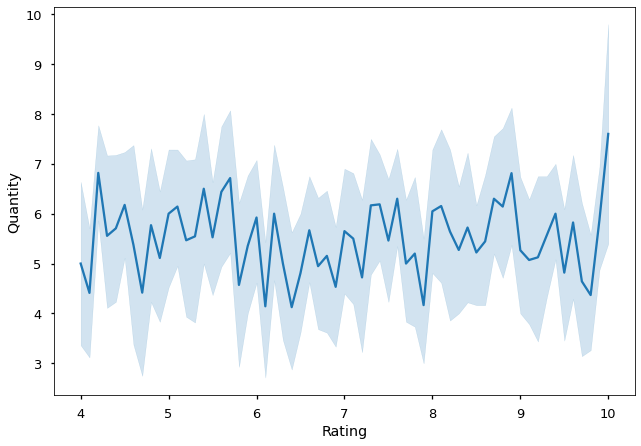

In [60]:
sns.lineplot(x = 'Rating', y = 'Quantity', data = merged)
plt.show()

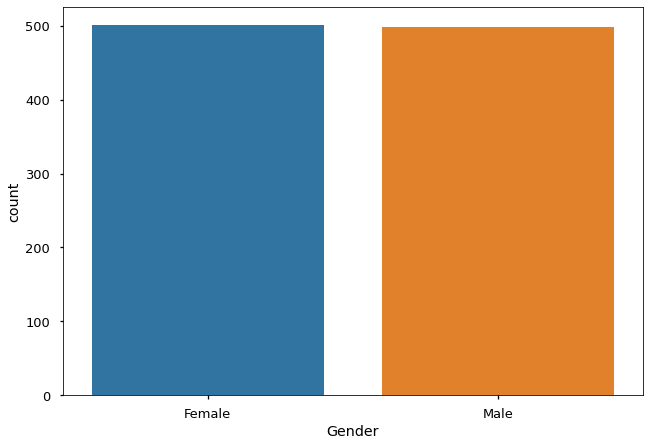

In [63]:
sns.countplot(x = 'Gender', data = merged)
plt.show()

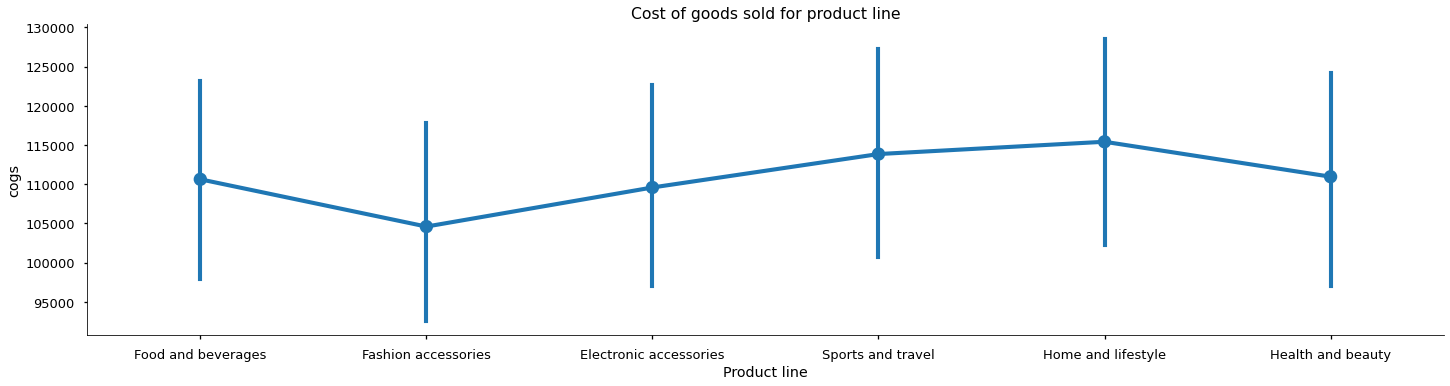

In [61]:
sns.catplot(x = 'Product line', y = 'cogs', data = merged, kind='point', aspect= 4)
plt.title('Cost of goods sold for product line')
plt.show()

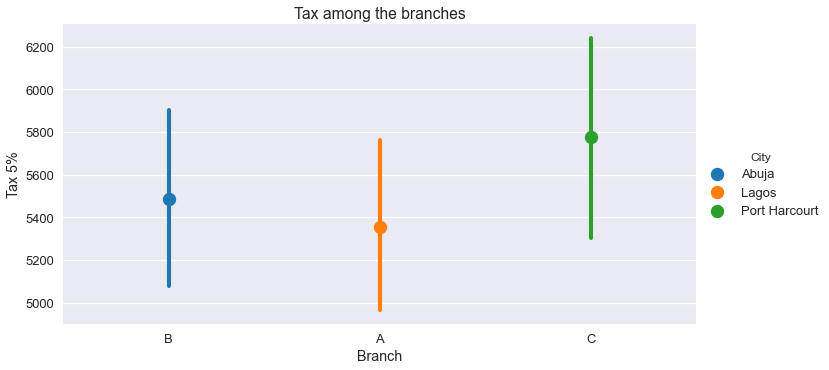

In [89]:
sns.catplot(x = 'Branch', y = 'Tax 5%', data = merged, kind='point', aspect= 2, hue = 'City')
plt.title('Tax among the branches')
plt.show()

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 

 - ###### A readme can be found in the repositry and the summary in a file titled Summary.ipynb